# LDA Topic Modeling

## Table of Contents

- Data Loading and Exploration
- Text Preprocessing
- Corpus Preparation and LDA Training
- Topic Analysis and Evaluation

In [1]:
# Standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import warnings
warnings.filterwarnings("ignore")

# NLTK for Text Preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
import re

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Progress Bar
from tqdm import tqdm

# Gensim for LDA Topic Modeling
import gensim
from gensim import corpora
from gensim.models import LdaModel, CoherenceModel

# PyLDAvis for Topic Visualization
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 60.4 MB/s eta 0:00:00


## Data Loading and Exploration

In [2]:
beaverton_url = 'https://drive.google.com/uc?export=download&id=173t6vMYcbSED81IOmg0MbhHsrSFSiF21'
billnye_url = 'https://drive.google.com/uc?export=download&id=1w1Xm-TQfcPfGICM_8_LQiWSqzf8WUk8N'
georgetakei_url = 'https://drive.google.com/uc?export=download&id=1_Ck9S2aW9cBQQrqoTiNLRmvRu4WvPn8y'
cookiemonster_url = 'https://drive.google.com/uc?export=download&id=10Av-HVklZA4Su3TcvSpxU6nS8At9mJ05'
neiltyson_url = 'https://drive.google.com/uc?export=download&id=1GSKxxldXe--HE4gSYAEn2ip2vS4bXKMM'
stephenking_url = 'https://drive.google.com/uc?export=download&id=1Oq2pUCv0d7x4tDKX1E-3hgdSAuXcZtVU'
twentytwo_minutes_url = 'https://drive.google.com/uc?export=download&id=1B2zwAJYdw_9skXAFbn7QIs6uyIikje5W'

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
beaverton = pd.read_excel(beaverton_url, engine='openpyxl')
beaverton.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tweet-id,tweet-text,tweet-author,tweet-timestamp-date
0,1,Heartwarming: This man reconnected with his mo...,The Beaverton,2022-03-05
1,2,OP-ED: Big Pharma put all of the chips in the ...,The Beaverton,2022-03-04
2,3,Make every day a 'talking to Americans about t...,The Beaverton,2022-03-04
3,4,Single drop of sweat falls down local dad’s fa...,The Beaverton,2022-03-04
4,5,100% of Canadians pretty sure they’ve had COVI...,The Beaverton,2022-03-03


In [4]:
billnye = pd.read_excel(billnye_url, engine='openpyxl')
billnye.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tweet-id,tweet-text,tweet-author,tweet-timestamp-date
0,1,"Happy Twosday, people(s). That’s right, it’s 2...",Bill Nye,2022-02-22
1,2,Dr. King would be 93 years old this week. The ...,Bill Nye,2022-01-17
2,3,Happy Isaac Newton’s Birthday James Webb Space...,Bill Nye,2021-12-25
3,4,"Please, consider the following… my new VR Spac...",Bill Nye,2021-12-14
4,5,Winter tornadoes… warm winter in the south & c...,Bill Nye,2021-12-12


In [5]:
georgetakei = pd.read_excel(georgetakei_url, engine='openpyxl')
georgetakei.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tweet-id,tweet-text,tweet-author,tweet-timestamp-date
0,1,He is still sorely missed. 💕 What is your favo...,georgetakei,2022-03-12
1,2,It’s terrifying but true. The GOP has become t...,georgetakei,2022-03-12
2,3,This is not normal.,georgetakei,2022-03-12
3,4,"Very well put, indeed.",georgetakei,2022-03-12
4,5,"With the former guy, mockery is the best polic...",georgetakei,2022-03-12


In [6]:
cookiemonster = pd.read_excel(cookiemonster_url, engine='openpyxl')
cookiemonster.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tweet-id,tweet-text,tweet-author,tweet-timestamp-date
0,1,"Today, me so thankful for chefs like me friend...",MeCookieMonster,2022-03-08
1,2,You can’t spell cookie without “oo.” Speaking ...,MeCookieMonster,2022-02-25
2,3,Me so grateful @SesameErnie\n. Me think sharin...,MeCookieMonster,2022-02-17
3,4,What do me love? Friends. Family. Cookies. Ple...,MeCookieMonster,2022-02-14
4,5,"Dipping cookies in milk? Me get it, but who ha...",MeCookieMonster,2022-01-28


In [7]:
neiltyson = pd.read_excel(billnye_url, engine='openpyxl')
neiltyson.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tweet-id,tweet-text,tweet-author,tweet-timestamp-date
0,1,"Happy Twosday, people(s). That’s right, it’s 2...",Bill Nye,2022-02-22
1,2,Dr. King would be 93 years old this week. The ...,Bill Nye,2022-01-17
2,3,Happy Isaac Newton’s Birthday James Webb Space...,Bill Nye,2021-12-25
3,4,"Please, consider the following… my new VR Spac...",Bill Nye,2021-12-14
4,5,Winter tornadoes… warm winter in the south & c...,Bill Nye,2021-12-12


In [8]:
stephenking = pd.read_excel(stephenking_url, engine='openpyxl')
stephenking.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tweet-id,tweet-text,tweet-author,tweet-timestamp-date
0,1,What kind of dinosaur writes romance novels? A...,StephenKing,2022-03-05
1,2,"Molly, aka the Thing of Evil, fools my friend ...",StephenKing,2022-02-25
2,3,Two questions (and a codicil) about MANIFEST: ...,StephenKing,2022-02-25
3,4,What most of us learned as kids on the playgro...,StephenKing,2022-02-23
4,5,"I need baseball! Come on you guys, stop being ...",StephenKing,2022-02-16


In [9]:
twentytwo_minutes = pd.read_excel(twentytwo_minutes_url, engine='openpyxl')
twentytwo_minutes.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tweet-id,tweet-text,tweet-author,tweet-timestamp-date
0,1,"And in lighter news this week: Nope, sorry. We...",22Minutes,2022-03-03 00:00:00
1,2,Dee Snider of Twisted Sister says he approves ...,22Minutes,2022-03-03 00:00:00
2,3,Tim Hortons will be releasing their own line o...,22Minutes,2022-03-03 00:00:00
3,4,A new survey shows that 1 in 8 people suffer f...,22Minutes,2022-03-02 00:00:00
4,5,The Bank of Canada has raised its interest rat...,22Minutes,2022-03-02 00:00:00


In [10]:
beaverton['account'] = 'The Beaverton'
billnye['account'] = 'Bill Nye'
georgetakei['account'] = 'George Takei'
cookiemonster['account'] = 'Cookie Monster'
neiltyson['account'] = 'Neil deGrasse Tyson'
stephenking['account'] = 'Stephen King'
twentytwo_minutes['account'] = 'This Hour Has 22 Minutes'

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
data = pd.concat([beaverton, billnye, georgetakei, cookiemonster, neiltyson, stephenking, twentytwo_minutes], ignore_index=True)
data.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tweet-id,tweet-text,tweet-author,tweet-timestamp-date,account
0,1,Heartwarming: This man reconnected with his mo...,The Beaverton,2022-03-05 00:00:00,The Beaverton
1,2,OP-ED: Big Pharma put all of the chips in the ...,The Beaverton,2022-03-04 00:00:00,The Beaverton
2,3,Make every day a 'talking to Americans about t...,The Beaverton,2022-03-04 00:00:00,The Beaverton
3,4,Single drop of sweat falls down local dad’s fa...,The Beaverton,2022-03-04 00:00:00,The Beaverton
4,5,100% of Canadians pretty sure they’ve had COVI...,The Beaverton,2022-03-03 00:00:00,The Beaverton


In [12]:
data.tail()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tweet-id,tweet-text,tweet-author,tweet-timestamp-date,account
1071,196,A student at U of T is launching a city-wide s...,22Minutes,2021-09-17 00:00:00,This Hour Has 22 Minutes
1072,197,New poll shows nearly half of Canadians don’t ...,22Minutes,2021-09-17 00:00:00,This Hour Has 22 Minutes
1073,198,Apple has introduced the iPhone 13! Huge! Mass...,22Minutes,2021-09-16 00:00:00,This Hour Has 22 Minutes
1074,199,The Price Is Right is celebrating its 50th yea...,22Minutes,2021-09-15 00:00:00,This Hour Has 22 Minutes
1075,200,Some restaurants are reporting a shortage of c...,22Minutes,2021-09-15 00:00:00,This Hour Has 22 Minutes


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   tweet-id              1076 non-null   int64 
 1   tweet-text            1076 non-null   object
 2   tweet-author          1076 non-null   object
 3   tweet-timestamp-date  1076 non-null   object
 4   account               1076 non-null   object
dtypes: int64(1), object(4)
memory usage: 42.2+ KB


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Text Preprocessing

In [14]:
# to initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
def preprocess_text(text):
    """
    Preprocesses text by expanding contractions, removing punctuation, tokenizing,
    lowercasing, removing stopwords and numbers, lemmatizing,
    and filtering short words (≤2 characters). Returns a list of cleaned tokens.
    """

    text = re.sub(r"n't", " not", text) # "can't" → "can not"
    text = re.sub(r"'m", " am", text) # "I'm" → "I am"
    text = re.sub(r"'re", " are", text) # "You're" → "You are"
    text = re.sub(r"'ll", " will", text) # "I'll" → "I will"
    text = re.sub(r"'ve", " have", text) # "I've" → "I have"
    text = re.sub(r"'s", "", text) # "child's" → "child"

    text = re.sub(r"[^\w\s]", "", text) # removes all punctuation after expanding contractions

    tokens = word_tokenize(text) # tokenization

    tokens = [token.lower() for token in tokens] # lowercasing

    tokens = [token for token in tokens if token not in stop_words] # removes stop words

    tokens = [lemmatizer.lemmatize(token) for token in tokens] # lemmatization

    # to remove short words (<=2 characters, except "I" and "am")
    # "I" is a valid pronoun and often important for sentence meaning.
    # "am" is a verb and critical for sentence structure (e.g., "I am happy" → "happy" loses meaning).
    tokens = [token for token in tokens if len(token) > 2 or token in {"i", "am"}]

    tokens = [token for token in tokens if not token.isdigit()] # removes numbers

    return tokens

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
tqdm.pandas() # tqdm.pandas() integrates the tqdm progress bar with pandas, allowing you to track progress when using .apply() on DataFrames or Series.

data['processed_tweet_text'] = data['tweet-text'].progress_apply(preprocess_text)
data[['tweet-text', 'processed_tweet_text']].head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 1076/1076 [00:03<00:00, 283.73it/s]


,tweet-text,processed_tweet_text
0,Heartwarming: This man reconnected with his mo...,"[heartwarming, man, reconnected, mom, could, a..."
1,OP-ED: Big Pharma put all of the chips in the ...,"[oped, big, pharma, put, chip, vaccine, get, ps5]"
2,Make every day a 'talking to Americans about t...,"[make, every, day, talking, american, healthca..."
3,Single drop of sweat falls down local dad’s fa...,"[single, drop, sweat, fall, local, dad, face, ..."
4,100% of Canadians pretty sure they’ve had COVI...,"[canadian, pretty, sure, theyve, covid, already]"


In [17]:
for text in data['processed_tweet_text'].head(25):
    print(text)

['heartwarming', 'man', 'reconnected', 'mom', 'could', 'ask', 'tax']
['oped', 'big', 'pharma', 'put', 'chip', 'vaccine', 'get', 'ps5']
['make', 'every', 'day', 'talking', 'american', 'healthcare', 'system', 'level', 'smug', 'day', 'shirt']
['single', 'drop', 'sweat', 'fall', 'local', 'dad', 'face', 'tell', 'daycare', 'worker', 'child', 'doesnt', 'runny', 'nose']
['canadian', 'pretty', 'sure', 'theyve', 'covid', 'already']
['local', 'fiancé', 'insists', 'buying', 'wedding', 'ring', 'bulk', 'totally', 'normal']
['congressional', 'bouncer', 'apologize', 'admitting', 'rowdy', 'bachelorette', 'party', 'state', 'union', 'stateoftheunion']
['immersive', 'art', 'experience', 'really', 'two', 'sens']
['political', 'cartoonist', 'mistaken', 'impression', 'political', 'cartoonist', 'never', 'important']
['climate', 'change', 'considering', 'makeover', 'stand', 'amongst', 'shiny', 'new', 'calamity']
['scientist', 'invents', 'time', 'travel', 'mock', 'people', 'thought', 'thing', 'bad']
['quiz', 'r

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Corpus Preparation and LDA Training

Topic modelling involves counting words and grouping similar word patterns to describe topics within the data. If the model knows the word frequency, and which words often appear in the same document, it will discover patterns that can group different words together.


In [18]:
# Creates a dictionary where each unique word gets a unique integer ID.
# The dictionary stores how many times each word appears across all documents.
id2word = corpora.Dictionary(data['processed_tweet_text'])

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
# Converts each document (text, which is a list of words) into a sparse vector.
corpus = [id2word.doc2bow(text) for text in data['processed_tweet_text']]
print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
[[(id2word[i], freq) for i, freq in doc] for doc in corpus[:1]]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[('ask', 1),
  ('could', 1),
  ('heartwarming', 1),
  ('man', 1),
  ('mom', 1),
  ('reconnected', 1),
  ('tax', 1)]]

Now, let's build an **LDA topic model**.

### Why These Parameters?

- `num_topics=15`: Sets the number of topics. Too few can mix unrelated words, and too many can make topics less clear. **Testing different numbers helps find the best fit.**
- `passes=50`: Runs the model multiple times to refine topics. More passes help improve results, but too many won't add much value.
- `update_every=1`: Updates the model after each batch of documents, making training faster and more efficient, especially for large datasets.
- `chunksize=200`: Processes 200 documents at a time, helping the model find clearer topics while keeping training fast.
- `alpha='auto'`: Lets the model decide if a document should focus on one topic or mix multiple topics.
- `per_word_topics=False`: Speeds up training by skipping extra details about individual words, which are usually not needed.

In [21]:
lda_model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=15, # It will be adjusted based on coherence score testing.
    passes=50,
    update_every=1,
    chunksize=200,
    alpha='auto',
    per_word_topics=False
)

# The coherence score measures how well the words in a topic are related, helping us evaluate the quality of the LDA model.
# A higher coherence score means better topics, making the model more useful!
coherence_model = CoherenceModel(
    model=lda_model,
    texts=data['processed_tweet_text'],
    dictionary=id2word,
    coherence='c_v'
)
coherence_score = coherence_model.get_coherence()

print(f"LDA Model Trained on All Accounts (Coherence Score: {coherence_score:.4f})")
print("-" * 100)
for topic in lda_model.print_topics(num_words=10):
    print(topic)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LDA Model Trained on All Accounts (Coherence Score: 0.4961)
----------------------------------------------------------------------------------------------------
(0, '0.032*"game" + 0.031*"big" + 0.025*"stop" + 0.022*"made" + 0.018*"fall" + 0.017*"average" + 0.015*"nasa" + 0.014*"yet" + 0.014*"spacex" + 0.014*"call"')
(1, '0.103*"day" + 0.063*"today" + 0.021*"celebrate" + 0.020*"come" + 0.020*"happy" + 0.017*"night" + 0.017*"fun" + 0.015*"maybe" + 0.014*"another" + 0.014*"wait"')
(2, '0.041*"let" + 0.025*"could" + 0.021*"want" + 0.020*"climate" + 0.020*"vote" + 0.019*"car" + 0.018*"bill" + 0.018*"good" + 0.017*"earth" + 0.017*"change"')
(3, '0.064*"cooky" + 0.048*"time" + 0.037*"see" + 0.032*"first" + 0.029*"friend" + 0.025*"today" + 0.022*"love" + 0.019*"day" + 0.017*"international" + 0.016*"far"')
(4, '0.027*"kid" + 0.026*"woman" + 0.023*"something" + 0.017*"space" + 0.017*"found" + 0.017*"world" + 0.017*"great" + 0.016*"eating" + 0.015*"oldest" + 0.015*"human"')
(5, '0.046*"said" + 0

## Topic Analysis and Evaluation

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


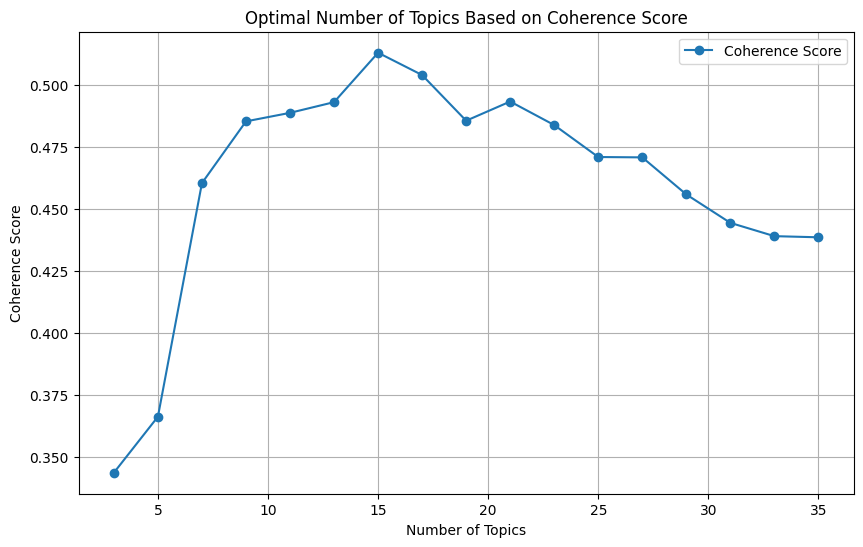

In [22]:
def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    coherence_values = []
    model_list = []
    num_topics_list = range(start, limit + 1, step)

    for num_topics in num_topics_list:
        model = gensim.models.LdaModel(
            corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=50,
            update_every=1, chunksize=200, alpha='auto', per_word_topics=False)
        model_list.append(model)

        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())

    return model_list, coherence_values, num_topics_list

model_list, coherence_values, num_topics_list = compute_coherence_values(
    dictionary=id2word,
    corpus=corpus,
    texts=data['processed_tweet_text'],
    start=3,
    limit=35,
    step=2
)

plt.figure(figsize=(10, 6))
plt.plot(num_topics_list, coherence_values, marker='o', linestyle='-')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics Based on Coherence Score")
plt.legend(["Coherence Score"], loc='best')
plt.grid(True);

We will use the model with the highest coherence score:

In [23]:
best_result_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[best_result_index]
best_num_topics = num_topics_list[best_result_index]

print(f"The optimal number of topics is {best_num_topics}, achieving the highest coherence score of {coherence_values[best_result_index]:.4f}.")
print("-" * 100)
for topic in optimal_model.print_topics(num_words=10):
    print(topic)

The optimal number of topics is 15, achieving the highest coherence score of 0.5128.
----------------------------------------------------------------------------------------------------
(0, '0.046*"canadian" + 0.042*"think" + 0.032*"first" + 0.024*"taco" + 0.024*"space" + 0.023*"look" + 0.021*"half" + 0.016*"birthday" + 0.016*"nasa" + 0.015*"set"')
(1, '0.037*"cdnpoli" + 0.030*"study" + 0.028*"word" + 0.027*"elxn44" + 0.024*"line" + 0.024*"movie" + 0.024*"vaccine" + 0.020*"cool" + 0.019*"tweet" + 0.019*"america"')
(2, '0.087*"like" + 0.026*"kid" + 0.025*"due" + 0.025*"dis" + 0.021*"want" + 0.021*"stop" + 0.021*"find" + 0.018*"sound" + 0.016*"right" + 0.015*"fight"')
(3, '0.048*"friend" + 0.033*"love" + 0.025*"need" + 0.019*"ready" + 0.017*"phone" + 0.016*"gas" + 0.015*"live" + 0.014*"worker" + 0.013*"thank" + 0.013*"owner"')
(4, '0.045*"best" + 0.031*"celebrate" + 0.027*"long" + 0.022*"really" + 0.021*"holiday" + 0.020*"life" + 0.019*"wonder" + 0.018*"looking" + 0.015*"young" + 0.014*"

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Let's see how the words are clustered using pyLDAVis.

In [24]:
p = gensimvis.prepare(optimal_model, corpus, id2word)
p

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.371943  0.009521       1        1  15.032863
11     0.028247 -0.229894       2        1  10.075529
10     0.020880  0.220699       3        1   9.704507
0      0.065279  0.069011       4        1   8.711099
14    -0.041095 -0.081317       5        1   7.478733
2      0.017446  0.011228       6        1   6.979522
5      0.006619  0.069257       7        1   6.411146
12     0.048340  0.020961       8        1   6.166774
6      0.056164 -0.040738       9        1   5.752757
8      0.043840  0.024744      10        1   4.847864
3      0.007562 -0.008022      11        1   4.630798
4      0.013643  0.003609      12        1   3.966420
1      0.039336 -0.046775      13        1   3.903155
13     0.047812 -0.021183      14        1   3.366528
7      0.017871 -0.001103      15        1   2.972305, topic_info=         Term        Freq       Total Category  logprob  loglift
16        day  149.000000  149.000000  Default  30.0000  30.0000
81        new  147.000000  147.000000  Default  29.0000  29.0000
148       say  104.000000  104.000000  Default  28.0000  28.0000
663       one  111.000000  111.000000  Default  27.0000  27.0000
375      like   83.000000   83.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
1085      lot    9.475358   29.730844  Topic15  -3.6604   2.3723
1097      yet    4.447373   12.163491  Topic15  -4.4168   2.5097
190   toronto    3.580708   19.156156  Topic15  -4.6336   1.8388
3         man    4.824876   40.157636  Topic15  -4.3354   1.3968
1235      far    2.592944   16.070333  Topic15  -4.9563   1.6917

[611 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
3715     15  0.875550       1000lbs
1215     11  0.756130           4th
829       9  0.824788          able
914       8  0.818571        access
473      13  0.632276  accidentally
...     ...       ...           ...
1097     15  0.328853           yet
1124     12  0.949438         young
381       3  0.775499         youre
381       4  0.166178         youre
621      15  0.793689          zoom

[705 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 12, 11, 1, 15, 3, 6, 13, 7, 9, 4, 5, 2, 14, 8])

**Topic 1** is the most dominant, represented by the largest circle in the Intertopic Distance Map and contributing significantly to the marginal topic distribution. **Topic 2** also stands out, as it is positioned far from the rest, indicating a distinct and specialized theme. Meanwhile, the remaining topics (e.g., **3**, **5**, **6**, etc.) are smaller and more closely clustered, suggesting they capture specific or overlapping subthemes within the broader discussions.

**Topic 1** is the largest and focuses on **current events, trends, and global issues**. Words like "**day**," "**new**," "**say**," "**today**," "**year**," and "**world**" highlight discussions about daily updates and global concerns. Terms like "**change**" and "**climate**" suggest that environmental issues are a key part of this topic.

**Topic 2** is unique and focuses on **space exploration and global reflections**. Words like "**space**," "**exploration**," "**celebrate**," "**pandemic**," and "**national**" show themes of celebrating achievements in science and reflecting on global challenges. This topic also includes words like "**mind**" and "**answer**," suggesting deeper thinking or commemorations tied to recent events.

**Topic 3** centers around **scientific progress, space missions, and global problems**. Words like "**nasa**," "**spacex**," "**exploreplanets**," "**pandemic**," "**vaccine**," and "**earth**" highlight themes of exploring space and addressing challenges like health and climate. Terms like "**big**" and "**congratulation**" suggest celebrating milestones in science and technology.

**Topic 5** focuses on **Canada-specific issues, entertainment, and challenges**. Words like "**canada**," "**election**," "**movie**," and "**science**" reflect discussions about national topics and cultural interests. Terms like "**challenge**" and "**school**" point to solving problems and education, while words like "**netflix**" add an entertainment aspect.

Now, let's compare the **distribution of topics across user accounts** based on the **optimal LDA model**.

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Processing Accounts: 100%|██████████| 7/7 [00:00<00:00, 24.63it/s]


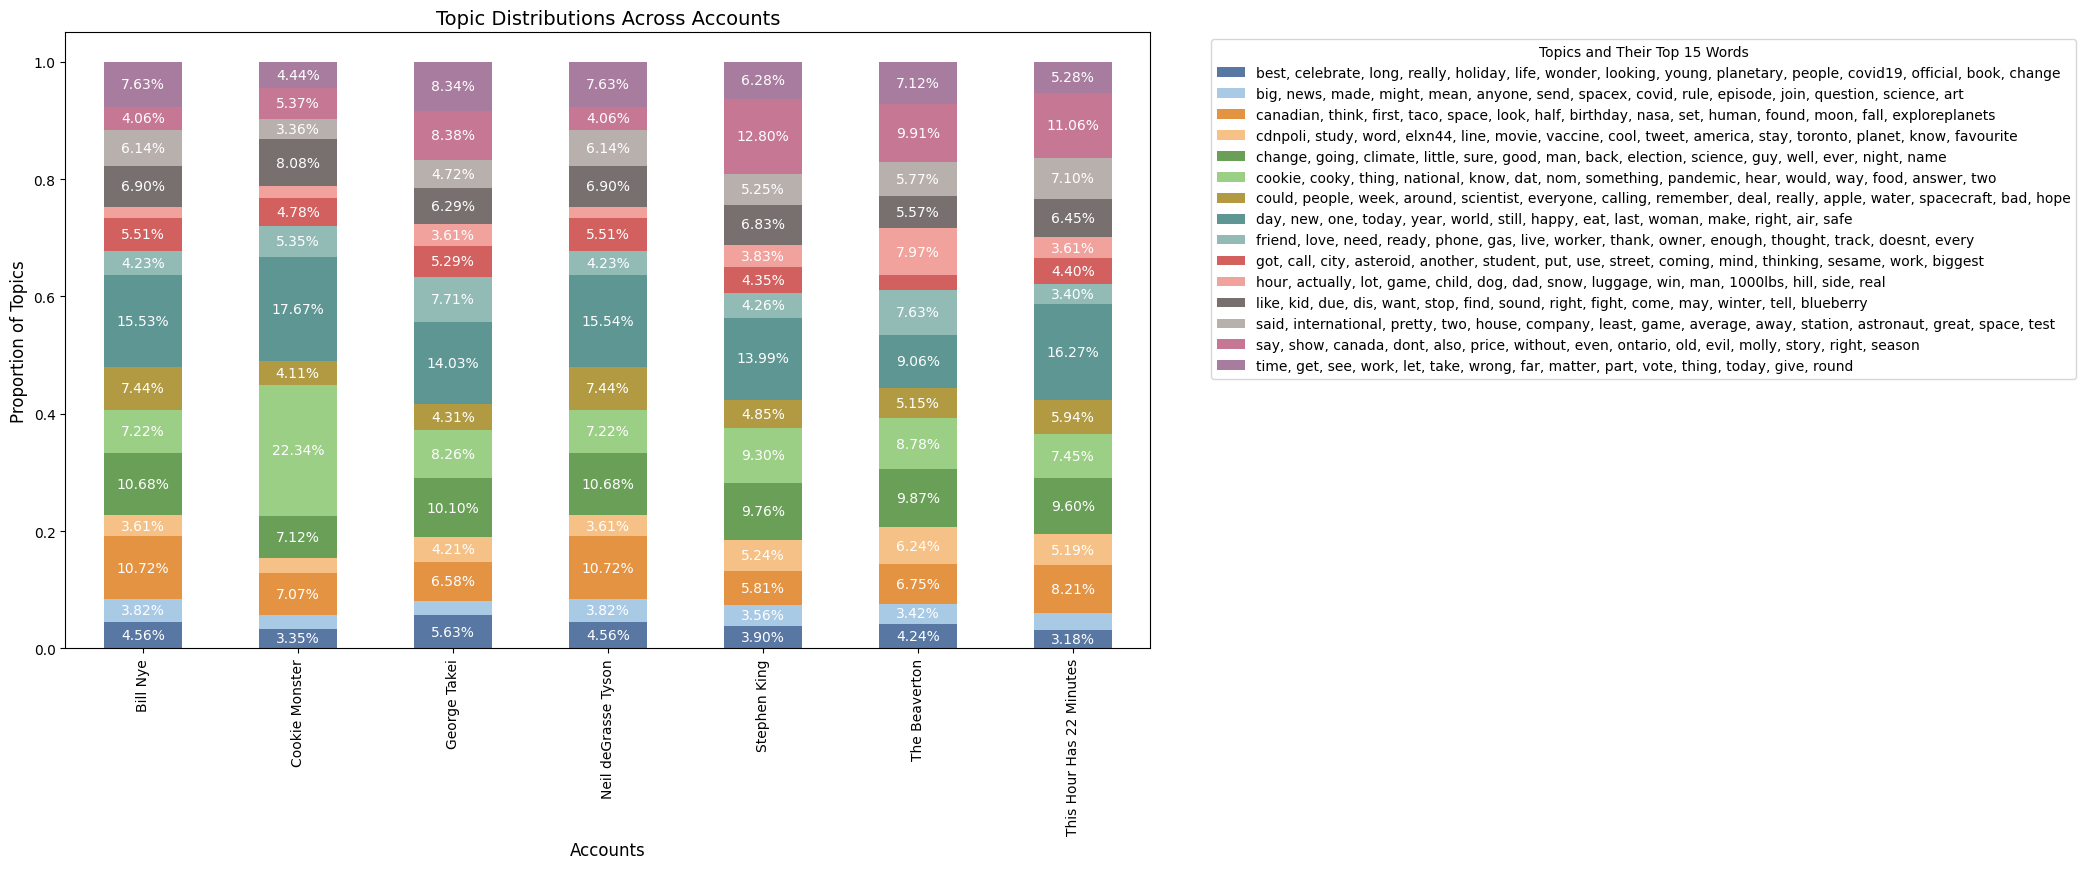

In [25]:
custom_palette = [
    "#5878a3", "#a9cae5", "#e49343", "#f5c187", "#6a9f58", "#9bcf86",
    "#b19a42", "#5d9693", "#92bbb6", "#d1605e", "#f1a29d", "#77706e",
    "#b8b0ad", "#c67794", "#a87c9f", "#977863", "#cda8c6"
]

account_topic_distribution = defaultdict(list) # dictionary to store topic distributions for each user

for account in tqdm(data['account'].unique(), desc="Processing Accounts"):
    account_data = data[data['account'] == account]

    account_corpus = [id2word.doc2bow(text) for text in account_data['processed_tweet_text']]

    topic_distributions = [optimal_model.get_document_topics(doc, minimum_probability=0.0) for doc in account_corpus]

    # to calculate average topic distribution for this account
    if topic_distributions:
        average_distribution = np.mean([[prob for _, prob in doc] for doc in topic_distributions], axis=0)

        account_topic_distribution[account] = average_distribution

# to convert the topic distributions into a DataFrame
topic_labels = [f"{', '.join([word for word, _ in optimal_model.show_topic(i, topn=15)])}" for i in range(best_num_topics)]
topic_distribution_df = pd.DataFrame(account_topic_distribution, index=topic_labels)

sorted_accounts = topic_distribution_df.T.sum(axis=1).sort_values(ascending=False).index
topic_distribution_df = topic_distribution_df[sorted_accounts]

df_melted = topic_distribution_df.T.reset_index().melt(id_vars="index", var_name="Topic", value_name="Proportion")
df_melted.rename(columns={"index": "Account"}, inplace=True)

df_pivot = df_melted.pivot(index="Account", columns="Topic", values="Proportion")

fig, ax = plt.subplots(figsize=(14, 8))
df_pivot.plot(kind="bar", stacked=True, color=custom_palette, ax=ax)

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0.03: # shows labels only for values >3% to reduce clutter
            ax.text(bar.get_x() + bar.get_width() / 2., bar.get_y() + height / 2.,
                    f"{height:.2%}", ha='center', va='center', fontsize=10, color="white")

plt.title("Topic Distributions Across Accounts", fontsize=14)
plt.xlabel("Accounts", fontsize=12)
plt.ylabel("Proportion of Topics", fontsize=12)
plt.legend(title="Topics and Their Top 15 Words", bbox_to_anchor=(1.05, 1), loc='upper left');

The stacked bar chart shows the proportional distribution of topics across various accounts. Each bar represents an account (e.g., Bill Nye, Cookie Monster, George Takei), and the segments within the bars correspond to different topics. The height of each segment reflects the proportion of the topic's contribution to the account's overall content.

**Bill Nye** and **Neil deGrasse Tyson** focus on education and science, while Cookie Monster emphasizes entertainment.

**George Takei** and **Stephen King** highlight daily updates and storytelling.

**The Beaverton** and **This Hour Has 22 Minutes** focus on satirical news and Canadian commentary, with unique emphasis on national issues.

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Bill Nye - Optimal Number of Topics: 20, Coherence Score: 0.5228
----------------------------------------------------------------------------------------------------
(0, '0.007*"climate" + 0.007*"much" + 0.007*"round" + 0.007*"see" + 0.007*"change" + 0.007*"exploreplanets" + 0.007*"today" + 0.003*"calling" + 0.003*"seriousness" + 0.003*"electricity"')
(1, '0.019*"science" + 0.010*"best" + 0.006*"marched" + 0.006*"woman" + 0.006*"world" + 0.006*"let" + 0.006*"day" + 0.006*"thats" + 0.006*"december" + 0.006*"able"')
(2, '0.005*"infectious" + 0.005*"gounder" + 0.005*"disease" + 0.005*"line" + 0.005*"specialist" + 0.005*"open" + 0.005*"phone" + 0.005*"affect" + 0.005*"coronavirus" + 0.005*"470askbill"')
(3, '0.013*"year" + 0.013*"change" + 0.011*"climate" + 0.009*"world" + 0.009*"happy" + 0.006*"news" + 0.006*"vote" + 0.006*"get" + 0.006*"clean" + 0.006*"many"')
(4, '0.005*"remarkable" + 0.005*"mar" + 0.005*"technical" + 0.005*"soon" + 0.005*"share" + 0.005*"challenge" + 0.005*"persevered"

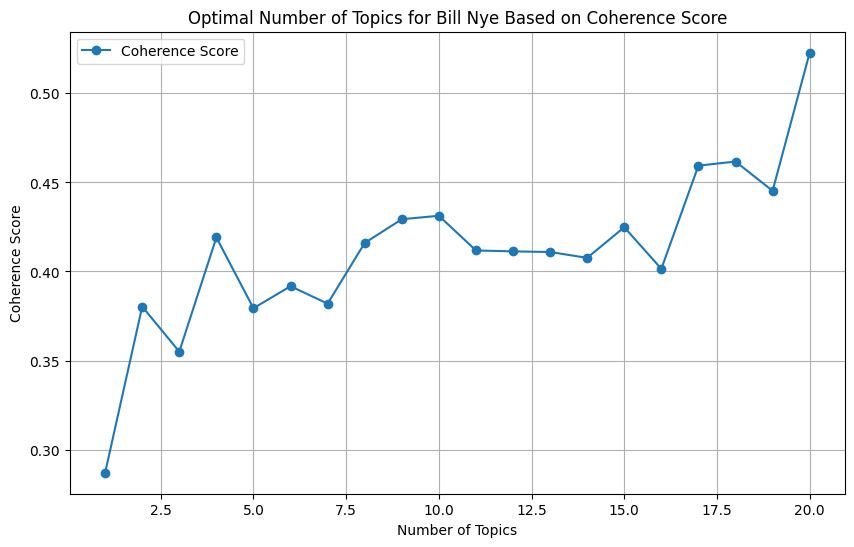

In [26]:
billnye_data = data[data['account'] == 'Bill Nye']
billnye_corpus = [id2word.doc2bow(text) for text in billnye_data['processed_tweet_text']]

billnye_model_list, billnye_coherence_values, billnye_num_topics_list = compute_coherence_values(
    dictionary=id2word,
    corpus=billnye_corpus,
    texts=billnye_data['processed_tweet_text'],
    start=1,
    limit=20,
    step=1
)

billnye_best_index = billnye_coherence_values.index(max(billnye_coherence_values))
billnye_optimal_model = billnye_model_list[billnye_best_index]
billnye_best_num_topics = billnye_num_topics_list[billnye_best_index]

print(f"Bill Nye - Optimal Number of Topics: {billnye_best_num_topics}, Coherence Score: {billnye_coherence_values[billnye_best_index]:.4f}")
print("-" * 100)
for topic in billnye_optimal_model.print_topics(num_words=10):
    print(topic)

plt.figure(figsize=(10, 6))
plt.plot(billnye_num_topics_list, billnye_coherence_values, marker='o', linestyle='-')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics for Bill Nye Based on Coherence Score")
plt.legend(["Coherence Score"], loc='best')
plt.grid(True);

In [27]:
p_billnye = gensimvis.prepare(billnye_optimal_model, billnye_corpus, id2word)
pyLDAvis.display(p_billnye)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Neil deGrasse Tyson - Optimal Number of Topics: 16, Coherence Score: 0.4800
----------------------------------------------------------------------------------------------------
(0, '0.009*"space" + 0.009*"work" + 0.006*"asteroid" + 0.006*"change" + 0.006*"exploreplanets" + 0.006*"exploration" + 0.006*"far" + 0.006*"spacecraft" + 0.006*"cool" + 0.006*"world"')
(1, '0.018*"happy" + 0.015*"day" + 0.008*"safe" + 0.008*"thank" + 0.008*"today" + 0.008*"one" + 0.008*"world" + 0.008*"thankful" + 0.008*"service" + 0.008*"people"')
(2, '0.013*"change" + 0.010*"science" + 0.010*"let" + 0.010*"climate" + 0.008*"day" + 0.008*"world" + 0.005*"school" + 0.005*"one" + 0.005*"everyone" + 0.005*"electricity"')
(3, '0.017*"day" + 0.010*"today" + 0.008*"life" + 0.006*"past" + 0.006*"year" + 0.006*"well" + 0.006*"ready" + 0.006*"clue" + 0.004*"earth" + 0.004*"every"')
(4, '0.015*"today" + 0.006*"year" + 0.006*"marched" + 0.006*"best" + 0.006*"woman" + 0.006*"era" + 0.006*"exploration" + 0.006*"planetary" +

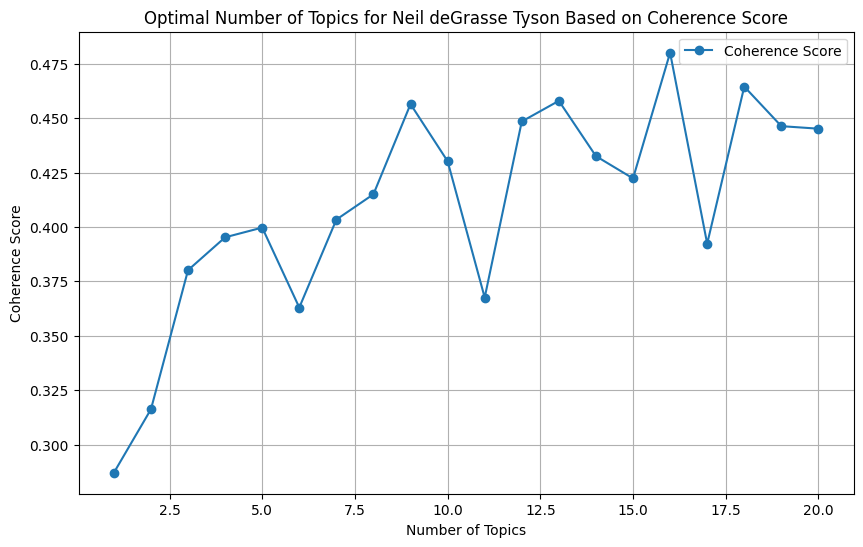

In [28]:
neiltyson_data = data[data['account'] == 'Neil deGrasse Tyson']
neiltyson_corpus = [id2word.doc2bow(text) for text in neiltyson_data['processed_tweet_text']]

neiltyson_model_list, neiltyson_coherence_values, neiltyson_num_topics_list = compute_coherence_values(
    dictionary=id2word,
    corpus=neiltyson_corpus,
    texts=neiltyson_data['processed_tweet_text'],
    start=1,
    limit=20,
    step=1
)

neiltyson_best_index = neiltyson_coherence_values.index(max(neiltyson_coherence_values))
neiltyson_optimal_model = neiltyson_model_list[neiltyson_best_index]
neiltyson_best_num_topics = neiltyson_num_topics_list[neiltyson_best_index]

print(f"Neil deGrasse Tyson - Optimal Number of Topics: {neiltyson_best_num_topics}, Coherence Score: {neiltyson_coherence_values[neiltyson_best_index]:.4f}")
print("-" * 100)
for topic in neiltyson_optimal_model.print_topics(num_words=10):
    print(topic)

plt.figure(figsize=(10, 6))
plt.plot(neiltyson_num_topics_list, neiltyson_coherence_values, marker='o', linestyle='-')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics for Neil deGrasse Tyson Based on Coherence Score")
plt.legend(["Coherence Score"], loc='best')
plt.grid(True);

In [29]:
p_neiltyson = gensimvis.prepare(neiltyson_optimal_model, neiltyson_corpus, id2word)
pyLDAvis.display(p_neiltyson)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cookie Monster - Optimal Number of Topics: 5, Coherence Score: 0.4857
----------------------------------------------------------------------------------------------------
(0, '0.002*"favorite" + 0.002*"finished" + 0.002*"ice" + 0.002*"cream" + 0.002*"truck" + 0.002*"food" + 0.001*"circle" + 0.001*"used" + 0.001*"tweeting" + 0.001*"help"')
(1, '0.003*"somebody" + 0.002*"dum" + 0.002*"meal" + 0.002*"wan" + 0.002*"list" + 0.001*"delicious" + 0.001*"prep" + 0.001*"gift" + 0.001*"learned" + 0.001*"tried"')
(2, '0.031*"cookie" + 0.028*"cooky" + 0.014*"eat" + 0.010*"dat" + 0.010*"dis" + 0.009*"nom" + 0.007*"friend" + 0.007*"like" + 0.007*"day" + 0.006*"today"')
(3, '0.062*"sesame" + 0.062*"street" + 0.062*"monster" + 0.061*"macaroon" + 0.061*"took" + 0.061*"city" + 0.061*"anywhereeeee" + 0.061*"born" + 0.061*"raised" + 0.001*"today"')
(4, '0.005*"meself" + 0.004*"get" + 0.002*"know" + 0.002*"little" + 0.002*"thought" + 0.001*"mouth" + 0.001*"full" + 0.001*"never" + 0.001*"treating" + 0.001*"c

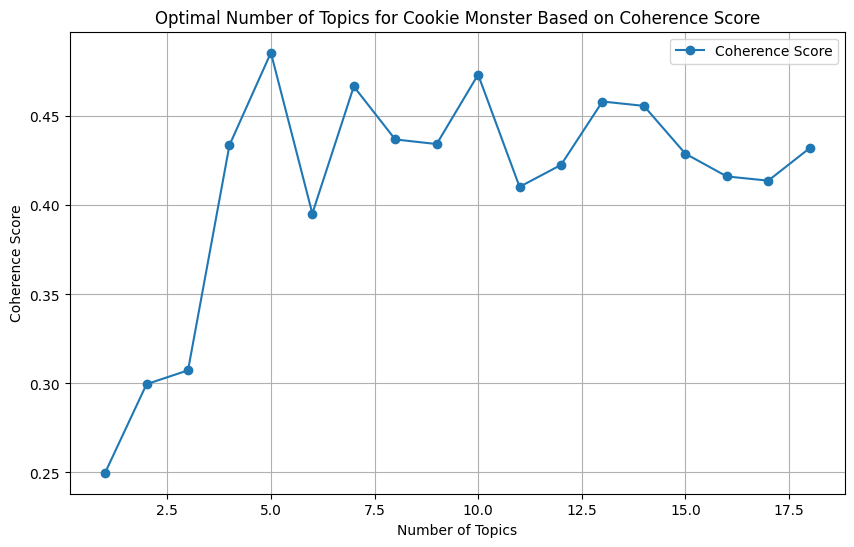

In [30]:
cookiemonster_data = data[data['account'] == 'Cookie Monster']
cookiemonster_corpus = [id2word.doc2bow(text) for text in cookiemonster_data['processed_tweet_text']]

cookiemonster_model_list, cookiemonster_coherence_values, cookiemonster_num_topics_list = compute_coherence_values(
    dictionary=id2word,
    corpus=cookiemonster_corpus,
    texts=cookiemonster_data['processed_tweet_text'],
    start=1,
    limit=20,
    step=1
)

cookiemonster_best_index = cookiemonster_coherence_values.index(max(cookiemonster_coherence_values))
cookiemonster_optimal_model = cookiemonster_model_list[cookiemonster_best_index]
cookiemonster_best_num_topics = cookiemonster_num_topics_list[cookiemonster_best_index]

print(f"Cookie Monster - Optimal Number of Topics: {cookiemonster_best_num_topics}, Coherence Score: {cookiemonster_coherence_values[cookiemonster_best_index]:.4f}")
print("-" * 100)
for topic in cookiemonster_optimal_model.print_topics(num_words=10):
    print(topic)

plt.figure(figsize=(10, 6))
plt.plot(cookiemonster_num_topics_list, cookiemonster_coherence_values, marker='o', linestyle='-')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics for Cookie Monster Based on Coherence Score")
plt.legend(["Coherence Score"], loc='best')
plt.grid(True);

In [31]:
p_cookiemonster = gensimvis.prepare(cookiemonster_optimal_model, cookiemonster_corpus, id2word)
pyLDAvis.display(p_cookiemonster)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


George Takei - Optimal Number of Topics: 6, Coherence Score: 0.5224
----------------------------------------------------------------------------------------------------
(0, '0.005*"gay" + 0.004*"folk" + 0.003*"family" + 0.003*"kid" + 0.003*"learn" + 0.003*"world" + 0.003*"even" + 0.003*"tell" + 0.003*"young" + 0.003*"shocked"')
(1, '0.006*"student" + 0.004*"texas" + 0.004*"right" + 0.003*"infinite" + 0.003*"incredibly" + 0.003*"voice" + 0.003*"say" + 0.002*"kid" + 0.002*"star" + 0.002*"much"')
(2, '0.006*"well" + 0.003*"mark" + 0.003*"hope" + 0.003*"pet" + 0.003*"also" + 0.003*"good" + 0.003*"impressive" + 0.003*"fascinating" + 0.003*"run" + 0.003*"see"')
(3, '0.003*"say" + 0.003*"face" + 0.003*"putin" + 0.003*"ukraine" + 0.003*"true" + 0.003*"war" + 0.003*"stand" + 0.003*"new" + 0.003*"best" + 0.003*"time"')
(4, '0.003*"refugee" + 0.003*"friend" + 0.003*"time" + 0.002*"right" + 0.002*"today" + 0.002*"deserving" + 0.002*"others" + 0.002*"pledge" + 0.002*"reminder" + 0.002*"always"')
(5

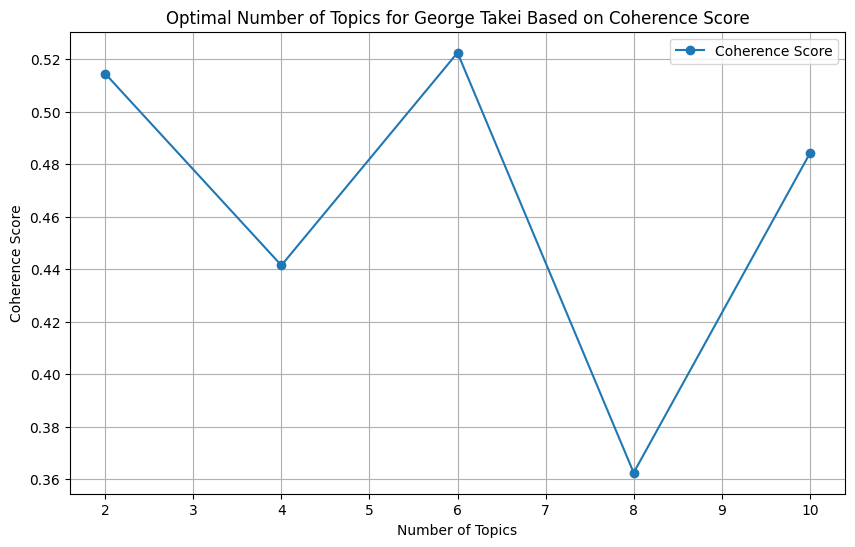

In [32]:
georgetakei_data = data[data['account'] == 'George Takei']
georgetakei_corpus = [id2word.doc2bow(text) for text in georgetakei_data['processed_tweet_text']]

georgetakei_model_list, georgetakei_coherence_values, georgetakei_num_topics_list = compute_coherence_values(
    dictionary=id2word,
    corpus=georgetakei_corpus,
    texts=georgetakei_data['processed_tweet_text'],
    start=2,
    limit=30,
    step=2
)

georgetakei_best_index = georgetakei_coherence_values.index(max(georgetakei_coherence_values))
georgetakei_optimal_model = georgetakei_model_list[georgetakei_best_index]
georgetakei_best_num_topics = georgetakei_num_topics_list[georgetakei_best_index]

print(f"George Takei - Optimal Number of Topics: {georgetakei_best_num_topics}, Coherence Score: {georgetakei_coherence_values[georgetakei_best_index]:.4f}")
print("-" * 100)
for topic in georgetakei_optimal_model.print_topics(num_words=10):
    print(topic)

plt.figure(figsize=(10, 6))
plt.plot(georgetakei_num_topics_list, georgetakei_coherence_values, marker='o', linestyle='-')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics for George Takei Based on Coherence Score")
plt.legend(["Coherence Score"], loc='best')
plt.grid(True);

In [33]:
p_georgetakei = gensimvis.prepare(georgetakei_optimal_model, georgetakei_corpus, id2word)
pyLDAvis.display(p_georgetakei)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Stephen King - Optimal Number of Topics: 19, Coherence Score: 0.6251
----------------------------------------------------------------------------------------------------
(0, '0.009*"club" + 0.009*"fight" + 0.004*"movie" + 0.004*"theater" + 0.004*"someone" + 0.004*"made" + 0.004*"van" + 0.004*"remember" + 0.004*"suffered" + 0.004*"injury"')
(1, '0.011*"season" + 0.008*"movie" + 0.005*"thing" + 0.004*"servant" + 0.004*"episode" + 0.004*"setting" + 0.004*"claustrophobic" + 0.004*"3rd" + 0.004*"brainchild" + 0.004*"night"')
(2, '0.007*"car" + 0.007*"least" + 0.007*"let" + 0.004*"actual" + 0.004*"show" + 0.004*"perfect" + 0.004*"instead" + 0.004*"call" + 0.004*"build" + 0.004*"although"')
(3, '0.008*"resisted" + 0.008*"still" + 0.008*"drone" + 0.008*"say" + 0.008*"shes" + 0.007*"good" + 0.007*"evil" + 0.005*"thing" + 0.004*"right" + 0.004*"know"')
(4, '0.008*"price" + 0.008*"right" + 0.008*"whole" + 0.008*"come" + 0.008*"make" + 0.004*"year" + 0.004*"hosted" + 0.004*"deadline" + 0.004*"reme

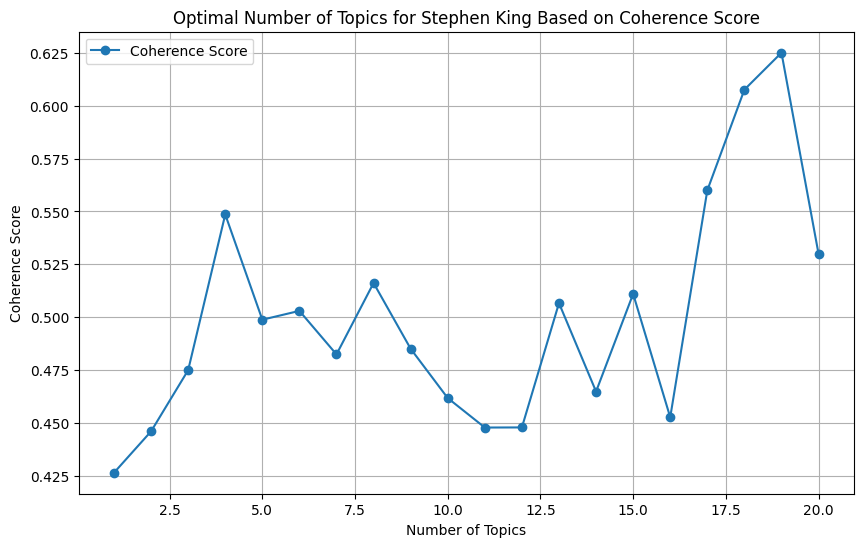

In [34]:
stephenking_data = data[data['account'] == 'Stephen King']
stephenking_corpus = [id2word.doc2bow(text) for text in stephenking_data['processed_tweet_text']]

stephenking_model_list, stephenking_coherence_values, stephenking_num_topics_list = compute_coherence_values(
    dictionary=id2word,
    corpus=stephenking_corpus,
    texts=stephenking_data['processed_tweet_text'],
    start=1,
    limit=20,
    step=1
)

stephenking_best_index = stephenking_coherence_values.index(max(stephenking_coherence_values))
stephenking_optimal_model = stephenking_model_list[stephenking_best_index]
stephenking_best_num_topics = stephenking_num_topics_list[stephenking_best_index]

print(f"Stephen King - Optimal Number of Topics: {stephenking_best_num_topics}, Coherence Score: {stephenking_coherence_values[stephenking_best_index]:.4f}")
print("-" * 100)
for topic in stephenking_optimal_model.print_topics(num_words=10):
    print(topic)

plt.figure(figsize=(10, 6))
plt.plot(stephenking_num_topics_list, stephenking_coherence_values, marker='o', linestyle='-')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics for Stephen King Based on Coherence Score")
plt.legend(["Coherence Score"], loc='best')
plt.grid(True);

In [35]:
p_stephenking = gensimvis.prepare(stephenking_optimal_model, stephenking_corpus, id2word)
pyLDAvis.display(p_stephenking)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The Beaverton - Optimal Number of Topics: 2, Coherence Score: 0.6233
----------------------------------------------------------------------------------------------------
(0, '0.004*"man" + 0.004*"canadian" + 0.003*"canada" + 0.003*"toronto" + 0.003*"scientist" + 0.002*"team" + 0.002*"life" + 0.002*"study" + 0.002*"time" + 0.002*"say"')
(1, '0.005*"local" + 0.003*"day" + 0.003*"man" + 0.003*"new" + 0.002*"climate" + 0.002*"report" + 0.002*"time" + 0.002*"woman" + 0.002*"make" + 0.002*"change"')


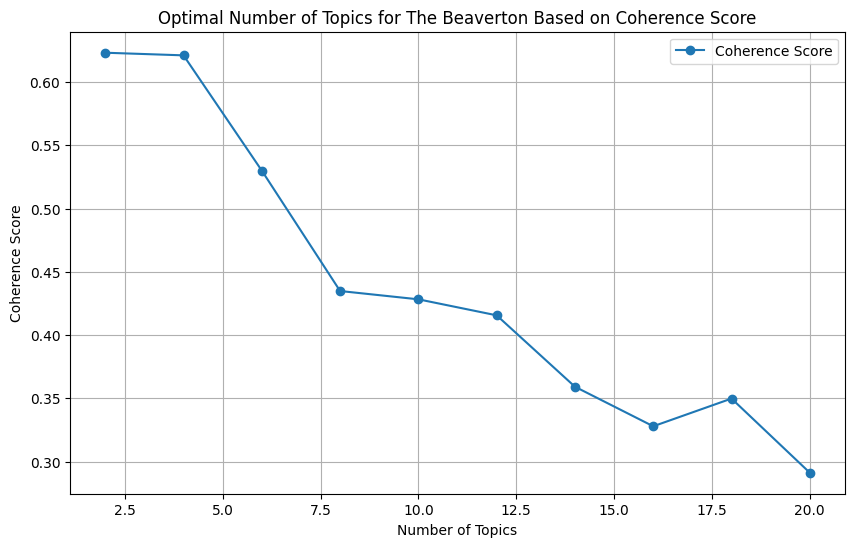

In [36]:
beaverton_data = data[data['account'] == 'The Beaverton']
beaverton_corpus = [id2word.doc2bow(text) for text in beaverton_data['processed_tweet_text']]

beaverton_model_list, beaverton_coherence_values, beaverton_num_topics_list = compute_coherence_values(
    dictionary=id2word,
    corpus=beaverton_corpus,
    texts=beaverton_data['processed_tweet_text'],
    start=2,
    limit=30,
    step=2
)

beaverton_best_index = beaverton_coherence_values.index(max(beaverton_coherence_values))
beaverton_optimal_model = beaverton_model_list[beaverton_best_index]
beaverton_best_num_topics = beaverton_num_topics_list[beaverton_best_index]

print(f"The Beaverton - Optimal Number of Topics: {beaverton_best_num_topics}, Coherence Score: {beaverton_coherence_values[beaverton_best_index]:.4f}")
print("-" * 100)
for topic in beaverton_optimal_model.print_topics(num_words=10):
    print(topic)

plt.figure(figsize=(10, 6))
plt.plot(beaverton_num_topics_list, beaverton_coherence_values, marker='o', linestyle='-')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics for The Beaverton Based on Coherence Score")
plt.legend(["Coherence Score"], loc='best')
plt.grid(True);

In [37]:
p_beaverton = gensimvis.prepare(beaverton_optimal_model, beaverton_corpus, id2word)
pyLDAvis.display(p_beaverton)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


This Hour Has 22 Minutes - Optimal Number of Topics: 9, Coherence Score: 0.5226
----------------------------------------------------------------------------------------------------
(0, '0.006*"say" + 0.006*"one" + 0.005*"day" + 0.005*"new" + 0.005*"canada" + 0.003*"time" + 0.003*"first" + 0.003*"raw" + 0.003*"woman" + 0.003*"whole"')
(1, '0.009*"taco" + 0.005*"new" + 0.005*"shortage" + 0.005*"ontario" + 0.004*"got" + 0.004*"say" + 0.004*"year" + 0.004*"day" + 0.004*"hour" + 0.004*"fun"')
(2, '0.006*"new" + 0.006*"day" + 0.006*"national" + 0.006*"canadian" + 0.005*"today" + 0.004*"minute" + 0.004*"said" + 0.004*"canada" + 0.004*"look" + 0.004*"punctuation"')
(3, '0.010*"new" + 0.004*"find" + 0.004*"get" + 0.004*"say" + 0.004*"back" + 0.004*"show" + 0.004*"milk" + 0.004*"marineland" + 0.003*"challenge" + 0.003*"survey"')
(4, '0.009*"new" + 0.006*"toronto" + 0.005*"study" + 0.005*"car" + 0.005*"report" + 0.005*"meanwhile" + 0.005*"said" + 0.003*"people" + 0.003*"ontario" + 0.003*"flying"'

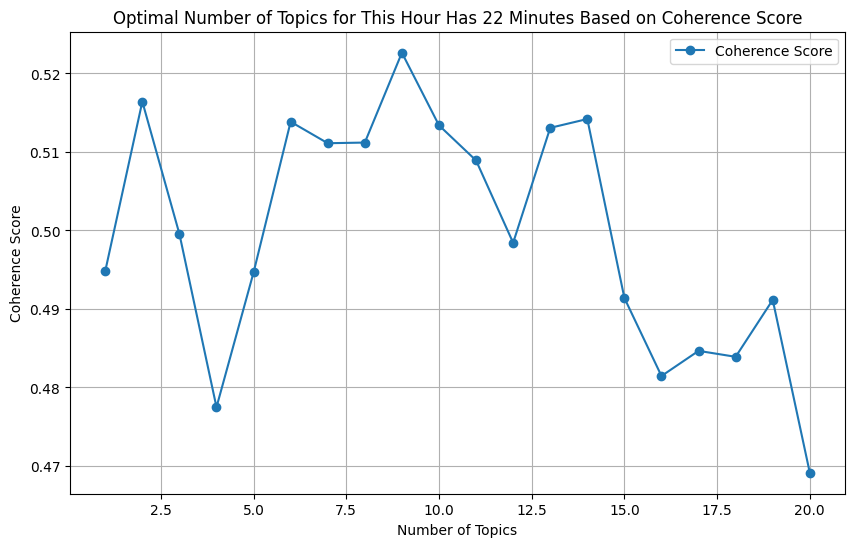

In [38]:
twentytwo_minutes_data = data[data['account'] == 'This Hour Has 22 Minutes']
twentytwo_minutes_corpus = [id2word.doc2bow(text) for text in twentytwo_minutes_data['processed_tweet_text']]

twentytwo_minutes_model_list, twentytwo_minutes_coherence_values, twentytwo_minutes_num_topics_list = compute_coherence_values(
    dictionary=id2word,
    corpus=twentytwo_minutes_corpus,
    texts=twentytwo_minutes_data['processed_tweet_text'],
    start=1,
    limit=20,
    step=1
)

twentytwo_minutes_best_index = twentytwo_minutes_coherence_values.index(max(twentytwo_minutes_coherence_values))
twentytwo_minutes_optimal_model = twentytwo_minutes_model_list[twentytwo_minutes_best_index]
twentytwo_minutes_best_num_topics = twentytwo_minutes_num_topics_list[twentytwo_minutes_best_index]

print(f"This Hour Has 22 Minutes - Optimal Number of Topics: {twentytwo_minutes_best_num_topics}, Coherence Score: {twentytwo_minutes_coherence_values[twentytwo_minutes_best_index]:.4f}")
print("-" * 100)
for topic in twentytwo_minutes_optimal_model.print_topics(num_words=10):
    print(topic)

plt.figure(figsize=(10, 6))
plt.plot(twentytwo_minutes_num_topics_list, twentytwo_minutes_coherence_values, marker='o', linestyle='-')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics for This Hour Has 22 Minutes Based on Coherence Score")
plt.legend(["Coherence Score"], loc='best')
plt.grid(True);

In [39]:
p_twentytwo_minutes = gensimvis.prepare(twentytwo_minutes_optimal_model, twentytwo_minutes_corpus, id2word)
pyLDAvis.display(p_twentytwo_minutes)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


For **Bill Nye**, the dominant topic is represented by terms such as "thing, question, fall, student, phone," likely suggesting discussions about **education, science, or curiosity-driven content**. The presence of topics like "big, hour, stop, NASA" hints at themes of **space exploration or scientific achievements**.

**Cookie Monster** shows a notable emphasis on the topic associated with "got, show, friend, love, word," which suggests a focus on **entertainment, relationships, or lighthearted content**. The relatively even distribution of other topics indicates a variety of themes, such as **nostalgia or general humor**.

For **George Takei**, terms like "day, new, say, today, one" dominate, pointing to topics centered around **daily updates, motivational posts, or reflective commentary**. Additional topics such as "call, pandemic, order, trying, pizza" suggest commentary on **current events or social issues**.

**Neil deGrasse Tyson** has a similar dominance of educational and reflective topics, such as "thing, question, fall, student, phone," indicating a primary focus on **scientific insights or public engagement**. The presence of space-related terms like "big, hour, stop, NASA" emphasizes **astronomy or cosmic exploration**.

For **Stephen King**, topics associated with "look, two, lot, last, national" suggest **storytelling or observations on cultural themes**. The presence of lighter topics, like "got, show, friend, love," implies occasional references to **personal connections or humor**.

**The Beaverton** emphasizes the topic "canadian, news, toronto, study, actually," which clearly aligns with **satirical news or Canadian cultural commentary**. The unique dominance of this topic sets the account apart from the others, focusing heavily on **national issues with a comedic spin**.

**This Hour Has 22 Minutes** features a strong presence of "canadian, news, toronto, study, actually," indicating its focus on **satirical or political commentary**. The diversity of smaller topics further suggests coverage of a variety of **current events or social issues**.